In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/Users/yourgrandpaprogenynamesmcky/Developer/BIG_DATA_AI/Hw6/HW5_PRSA_Data_Tiantan-661316-17391651632798.csv')

In [3]:
df['datetime']=df['year'].astype(str).str.cat([df['month'].astype(str),df['day'].astype(str),df['hour'].astype(str)], sep='-')
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d-%H')
df.set_index('datetime', inplace=True)

In [4]:
dataframe = df[["PRES"]]
dataframe.fillna(method="ffill",inplace=True)

In [24]:
df['PRES'].isna().sum()

20

In [5]:
dataframe.resample('D').mean().round(2)

,PRES
datetime,
2013-03-01,1028.78
2013-03-02,1028.85
2013-03-03,1016.46
2013-03-04,1019.45
2013-03-05,1012.70
...,...
2017-02-24,1021.01
2017-02-25,1018.81
2017-02-26,1020.34


In [6]:
dataframe.tail()

,PRES
datetime,
2017-02-28 19:00:00,1013.5
2017-02-28 20:00:00,1013.6
2017-02-28 21:00:00,1014.2
2017-02-28 22:00:00,1014.4
2017-02-28 23:00:00,1014.1


In [7]:
dataframe.columns

Index(['PRES'], dtype='object')

<Axes: xlabel='datetime'>

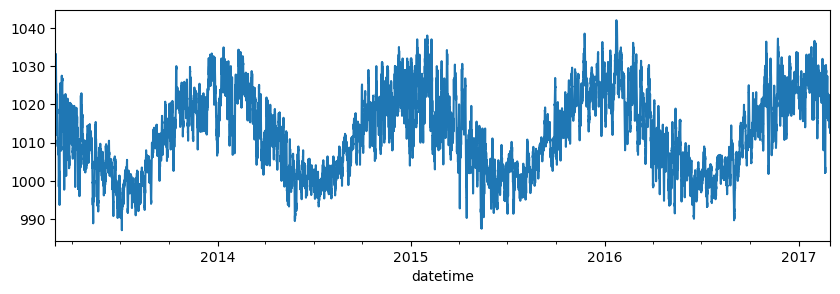

In [8]:
dataframe['PRES'].plot(figsize=(10,3))

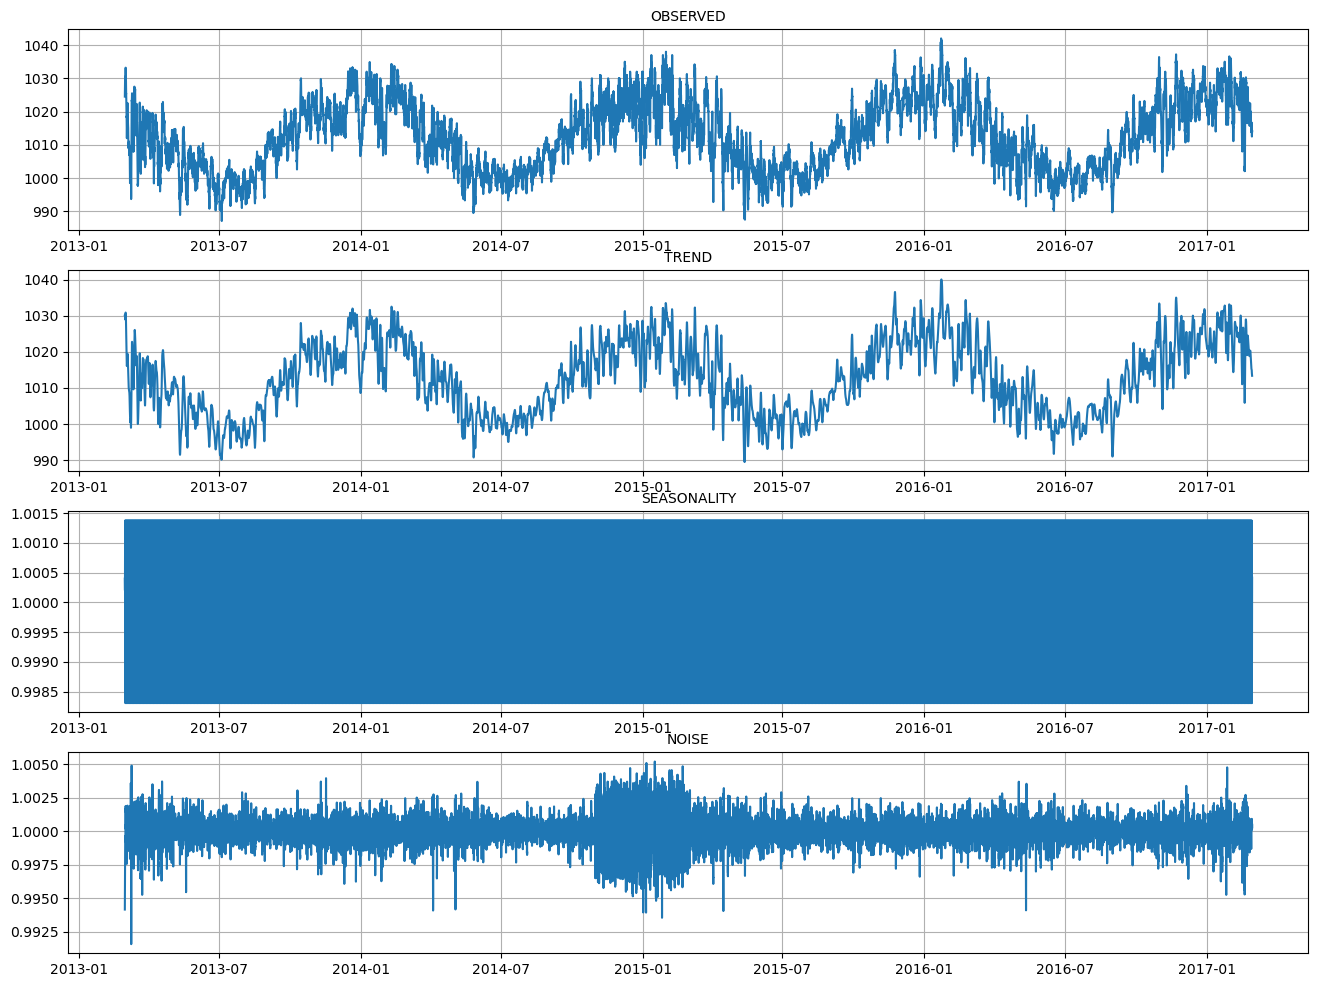

In [9]:
res=sm.tsa.seasonal_decompose(dataframe['PRES'],model='multiplicative',extrapolate_trend ='freq')
fig, axs = plt.subplots(4, figsize=(16,12))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

In [10]:
dataframe.sort_index(ascending=True)

,PRES
datetime,
2013-03-01 00:00:00,1024.5
2013-03-01 01:00:00,1025.1
2013-03-01 02:00:00,1025.3
2013-03-01 03:00:00,1026.2
2013-03-01 04:00:00,1027.1
...,...
2017-02-28 19:00:00,1013.5
2017-02-28 20:00:00,1013.6
2017-02-28 21:00:00,1014.2


In [11]:
df_train = dataframe[:'2016-12-31 23:59:59']
df_test = dataframe['2017-01-01 00:00:00':]

In [12]:
df_train['p_lag1']=df_train['PRES'].shift(1)
df_train['p_forward1']=df_train['PRES'].shift(-1)
df_train

,PRES,p_lag1,p_forward1
datetime,,,
2013-03-01 00:00:00,1024.5,NaN,1025.1
2013-03-01 01:00:00,1025.1,1024.5,1025.3
2013-03-01 02:00:00,1025.3,1025.1,1026.2
2013-03-01 03:00:00,1026.2,1025.3,1027.1
2013-03-01 04:00:00,1027.1,1026.2,1027.5
...,...,...,...
2016-12-31 19:00:00,1022.0,1021.9,1022.4
2016-12-31 20:00:00,1022.4,1022.0,1022.1
2016-12-31 21:00:00,1022.1,1022.4,1022.7


In [13]:
df_train['p_ma2']=df_train['PRES'].rolling(2).mean()
df_train

,PRES,p_lag1,p_forward1,p_ma2
datetime,,,,
2013-03-01 00:00:00,1024.5,NaN,1025.1,NaN
2013-03-01 01:00:00,1025.1,1024.5,1025.3,1024.80
2013-03-01 02:00:00,1025.3,1025.1,1026.2,1025.20
2013-03-01 03:00:00,1026.2,1025.3,1027.1,1025.75
2013-03-01 04:00:00,1027.1,1026.2,1027.5,1026.65
...,...,...,...,...
2016-12-31 19:00:00,1022.0,1021.9,1022.4,1021.95
2016-12-31 20:00:00,1022.4,1022.0,1022.1,1022.20
2016-12-31 21:00:00,1022.1,1022.4,1022.7,1022.25


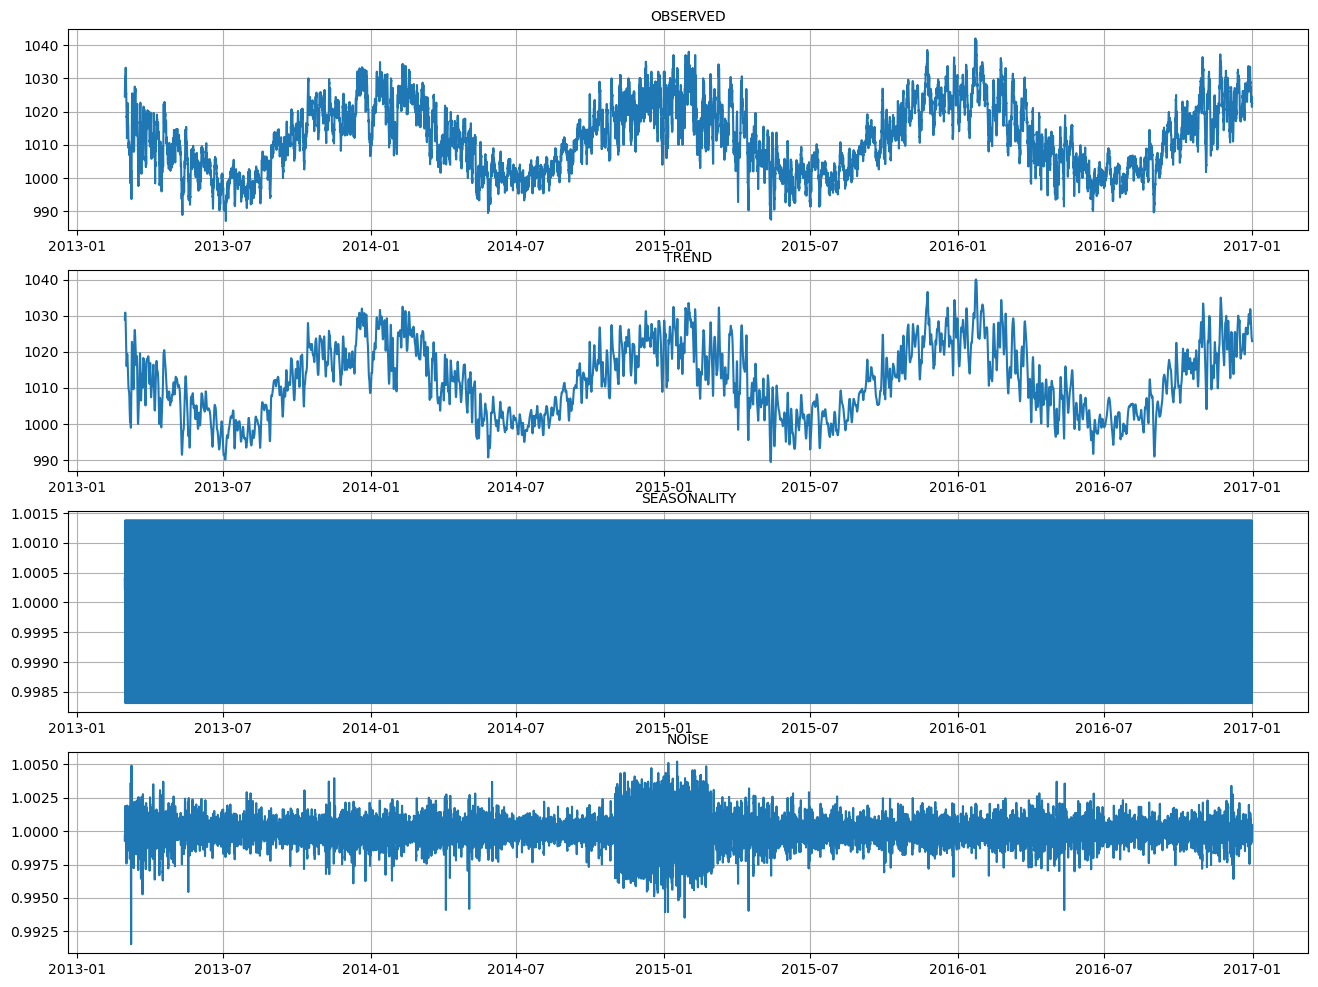

In [14]:
res=sm.tsa.seasonal_decompose(df_train['PRES'],model='multiplicative')
fig, axs = plt.subplots(4, figsize=(16,12))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

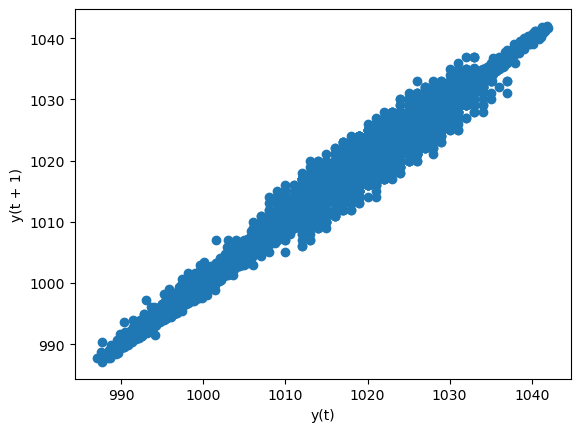

In [15]:
pd.plotting.lag_plot(df_train['PRES'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

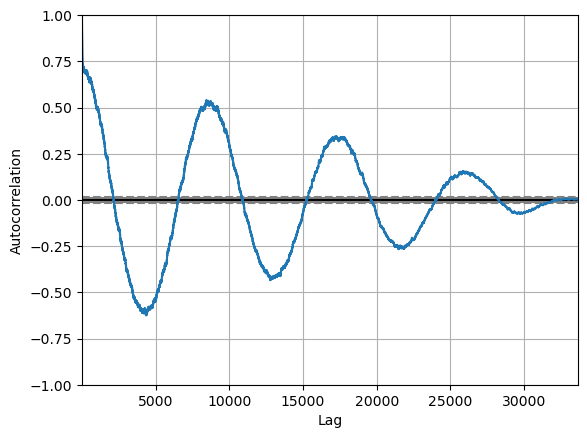

In [16]:
pd.plotting.autocorrelation_plot(df_train['PRES'])

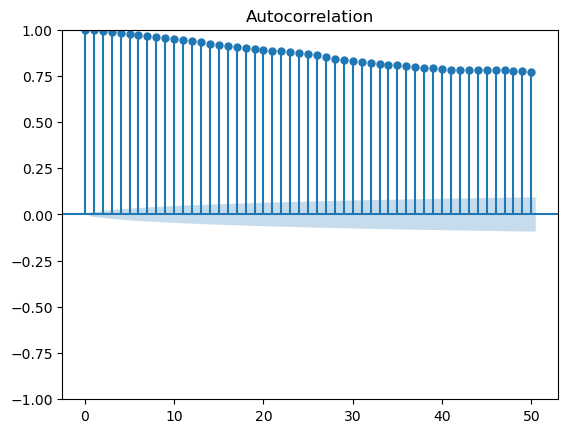

In [17]:
sm.graphics.tsa.plot_acf(df_train['PRES'],lags=50)
plt.show()

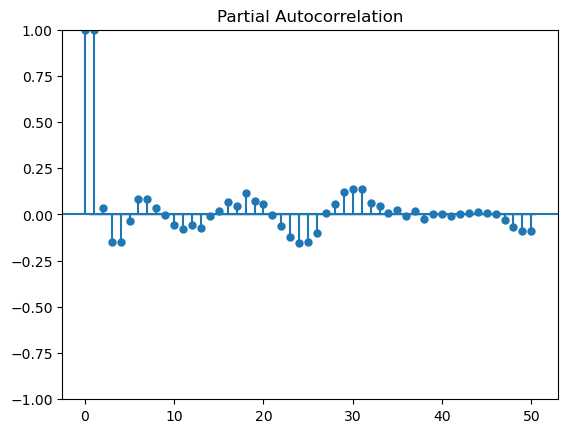

In [18]:
sm.graphics.tsa.plot_pacf(df_train['PRES'],lags=50)
plt.show()

In [22]:
df_train.isna().count()

PRES          33648
p_lag1        33648
p_forward1    33648
p_ma2         33648
dtype: int64

MAPE (In-Sample): 0.0005121766764860495


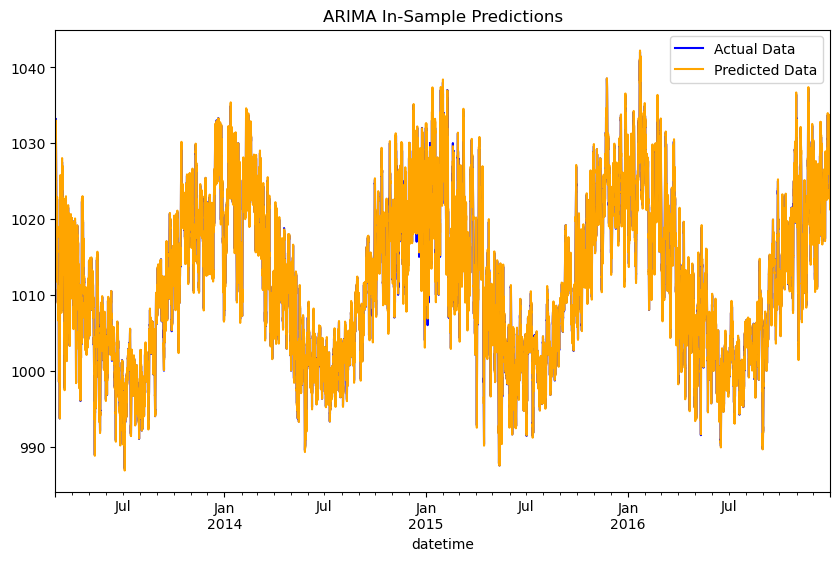

MAPE (Out-of-Sample): 0.004686530023017486


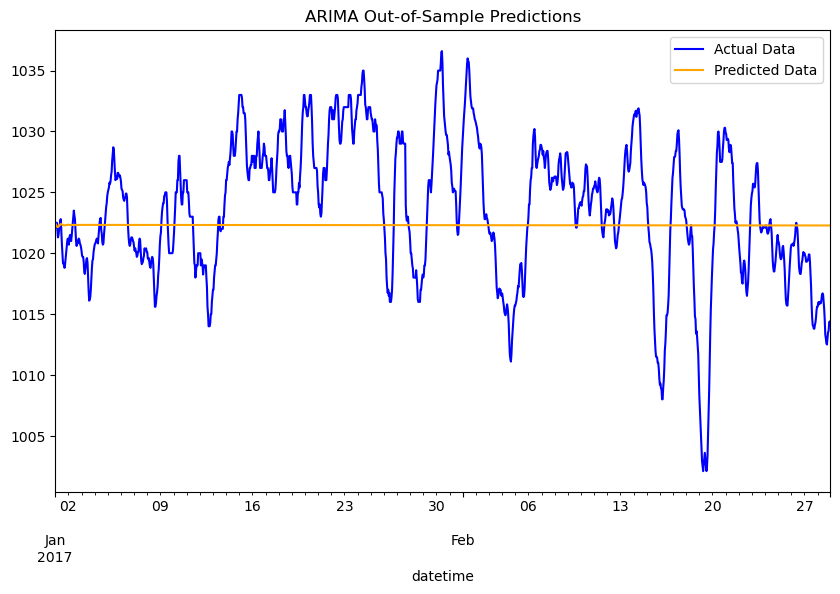

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

model = ARIMA(df_train['PRES'], order=(13, 1, 0), trend='t', exog=None, missing='drop')
result = model.fit()
result.summary()

pred_in_sample = result.predict(start=df_train.index[0], end=df_train.index[-1])
df_train['pred_arima'] = pred_in_sample

df_train1 = df_train.iloc[1:].copy()
print('MAPE (In-Sample):', mean_absolute_percentage_error(df_train1['PRES'], df_train1['pred_arima']))

plt.figure(figsize=(10, 6))
df_train['PRES'].plot(color='blue', label='Actual Data')
df_train1['pred_arima'].plot(color='orange', label='Predicted Data')
plt.title('ARIMA In-Sample Predictions')
plt.legend()
plt.show()

pred_out_of_sample = result.predict(start='2017-01-01 00:00:00', end='2017-02-28 23:00:00')

df_test['pred_ar'] = pred_out_of_sample

print('MAPE (Out-of-Sample):', mean_absolute_percentage_error(df_test['PRES'], df_test['pred_ar']))

plt.figure(figsize=(10, 6))
df_test['PRES'].plot(color='blue', label='Actual Data')
df_test['pred_ar'].plot(color='orange', label='Predicted Data')
plt.title('ARIMA Out-of-Sample Predictions')
plt.legend()
plt.show()

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from tqdm import tqdm

class SARIMAXWithProgress(SARIMAX):
    def fit(self, *args, **kwargs):
        with tqdm(total=100, desc="Training Progress", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]") as pbar:
            result = super().fit(*args, **kwargs, callback=lambda x: pbar.update(5))
        return result

model = SARIMAXWithProgress(
    df_train['PRES'],
    order=(1, 1, 1),
    seasonal_order=(0, 1, 0, 365)
)

result = model.fit()
print(result.summary())

pred_in_sample = result.predict(start=df_train.index[0], end=df_train.index[-1])
df_train['pred_sarimax'] = pred_in_sample

df_train1 = df_train.iloc[1:].copy()
print('MAPE (In-Sample):', mean_absolute_percentage_error(df_train1['PRES'], df_train1['pred_sarimax']))

plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train['PRES'], label='Actual Data', color='blue')
plt.plot(df_train.index, df_train['pred_sarimax'], label='Predicted Data', color='orange')
plt.title('SARIMAX In-Sample Predictions')
plt.legend()
plt.show()

pred_out_of_sample = result.predict(start='2017-01-01 00:00:00', end='2017-02-28 23:00:00')
df_test['pred_sarimax'] = pred_out_of_sample

print('MAPE (Out-of-Sample):', mean_absolute_percentage_error(df_test['PRES'], df_test['pred_sarimax']))

plt.figure(figsize=(10, 6))
plt.plot(df_test.index, df_test['PRES'], label='Actual Data', color='blue')
plt.plot(df_test.index, df_test['pred_sarimax'], label='Predicted Data', color='orange')
plt.title('SARIMAX Out-of-Sample Predictions')
plt.legend()
plt.show()

Training Progress:   0%|          | 0/100 [00:00<?]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69748D+00    |proj g|=  6.85203D-02


 This problem is unconstrained.
Training Progress:  15%|█▌        | 15/100 [3:12:12<18:09:11]


KeyboardInterrupt: 